In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pfam_list = ['PF00091','PF00092','PF00125','PF00174','PF00190','PF00207','PF00239','PF00339',\
             'PF00388','PF00394','PF00479','PF00640','PF00743','PF00763','PF00925']
#s = np.loadtxt('pfam_2_40k.txt',dtype='str')
#pfam_list = s[:,0]

In [3]:
def di_top(d,top):
    # find value of top biggest
    d1 = d.copy()
    np.fill_diagonal(d1, 0)
    #print(d1)
    
    a = d1.reshape((-1,))
    #print(a)    
    a = np.sort(a)[::-1] # descreasing sort
    #print(a)

    top_value = a[top]
    #print(top_value)
       
    # fill the top largest to be 1, other 0
    top_pos = d1 > top_value
    #print(top_pos)
    d1[top_pos] = 1.
    d1[~top_pos] = 0.
    #print(d1)
    
    xy = np.argwhere(d1==1)  
    return xy

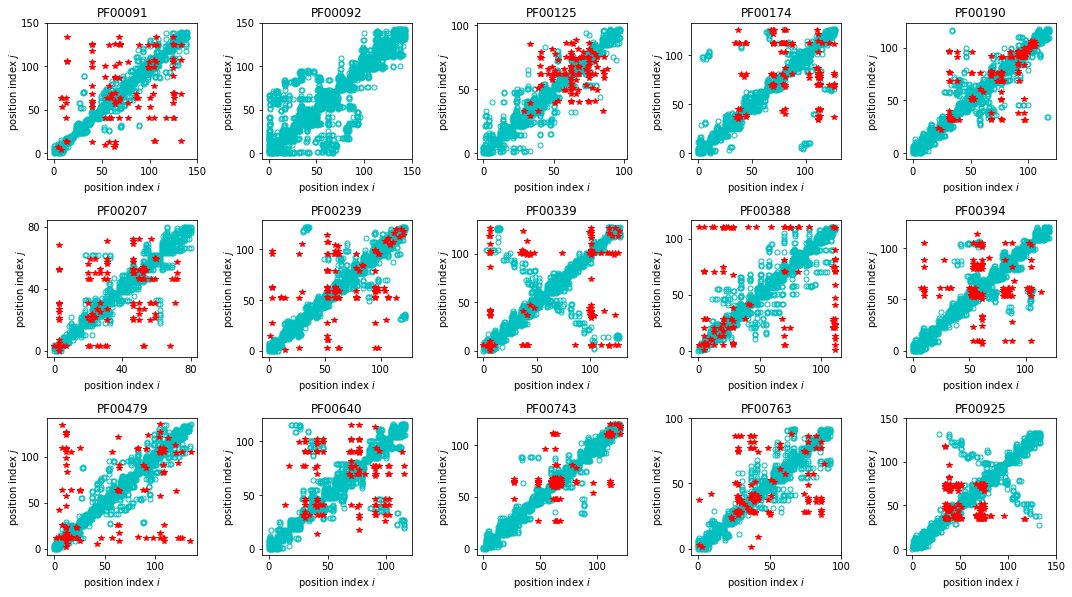

In [4]:
cutoff = 4.
top = 100

nx,ny = 5,3
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.,ny*2.8))

ij = 0
for j in range(ny):
    for i in range(nx):
        pfam = pfam_list[ij]    

        #ct = np.loadtxt('../../pfam_2_100k/%s_ct.txt'%pfam)
        #di = np.loadtxt('../ER_l2_100/%s/di.dat'%pfam)

        ct = np.loadtxt('../pfam_2_100k/%s_ct.txt'%pfam)
        di = np.loadtxt('%s/di.dat'%pfam)
        
        ct_top = np.argwhere(ct < cutoff)
        xy_di = di_top(di,top)

        ax[j,i].plot(ct_top[:,0],ct_top[:,1],'co',markersize=5,mfc='none',label='contact map')
        ax[j,i].plot(xy_di[:,0],xy_di[:,1],'r*',markersize=6,label='direct information')

        ax[j,i].set_title('%s'%pfam)
        ax[j,i].set_xlabel('position index $i$')
        ax[j,i].set_ylabel('position index $j$',labelpad=0)
        
        ij += 1

        if j != 1 or i != 0:
            ax[j,i].set_xticks([0,50,100])
            ax[j,i].set_yticks([0,50,100])

ax[1,0].set_xticks([0,40,80])
ax[1,0].set_yticks([0,40,80])

ax[0,0].set_xticks([0,50,100,150])
ax[0,0].set_yticks([0,50,100,150])

ax[0,1].set_xticks([0,50,100,150])
ax[0,1].set_yticks([0,50,100,150])

ax[2,4].set_xticks([0,50,100,150])
ax[2,4].set_yticks([0,50,100,150])
        
plt.tight_layout(h_pad=1, w_pad=1.5)

plt.savefig('fig_top100.pdf',format='pdf', dpi=100)
#plt.close()